# DU 1:  Decoding Protein Networks In Thousands of Single Cancer Cells

### Protein Networks Group

Welcome to this exciting exploration of protein networks in single cancer cells! In this notebook, we will analyze data derived from iterative immunofluorescence, a cutting-edge technique that allows us to measure the amounts and spatial locations of proteins within individual cells. This approach is a powerful tool for decoding complex protein interactions and understanding cellular behavior, particularly in cancer biology.

The data you will be working with in this module was generated by the Brunk lab and the Pervis lab at UNC Chapel Hill.

## What is Iterative Immunofluorescence?

Iterative immunofluorescence is a cutting-edge technique used to study the abundance and spatial distribution of proteins within single cells. Here’s how it works:

1. **Staining the cells**: Antibodies specific to target proteins are tagged with fluorophores (light-emitting molecules) and applied to cells.
2. **Imaging**: Fluorescent signals from the tagged proteins are captured using microscopy.
3. **Washing and repeating**: The antibodies are washed off, and new sets of antibodies are applied. This process is repeated for multiple cycles, enabling the measurement of dozens of proteins in the same cells.

This approach allows us to study a wide array of proteins while maintaining their context within individual cells.

---

## Example Image of Single Cells with Labeled Proteins

In the image below, each **circle represents a single cell**. Within each cell:

- The **nucleus**, which holds all the cell’s DNA, is stained using a **blue-colored dye**.
- Two key proteins are simultaneously stained:
  - **MYC**: Stained using anti-bodies linked to **red-colored fluorophores**.
  - **BRD4**: Stained using anti-bodies linked to **green-colored fluorophores**.

### What Do MYC and BRD4 Do?
MYC and BRD4 are proteins that work together to regulate transcription, the process by which cells produce RNA from their DNA. This RNA expression influences hundreds of target genes critical for cellular function and adaptation. 

### Why Analyze These Proteins?
The relationship between the abundances of MYC and BRD4 within the same cell can provide valuable insights into cellular processes, including:
- Whether their levels are **correlated** (e.g., higher MYC might correspond to higher BRD4).
- How their interactions influence **gene regulation** and overall cellular behavior.

By examining this image and analyzing the data, we aim to uncover patterns in how these proteins work together in single cells. This understanding can shed light on key processes in both normal and cancerous cells.


In [1]:
from IPython.display import Image, display, HTML

# Display the image with custom size and centering
display(HTML('<div style="text-align: center;"><img src="4i.png" style="width:50%; height:auto;"></div>'))


## The Dataset

The dataset you will work with consists of measurements for **29 different proteins** collected from thousands of cancer cells. Each protein was:

- Detected using antibodies tagged with unique fluorophores.
- Measured iteratively through cycles of staining and imaging.

The data captures:

- **Protein abundance**: How much of each protein is present in a given cell.
- **Protein localization**: Where each protein is located in the cell (e.g., nucleus, cytoplasm, membrane).

This dataset provides a powerful opportunity to decode protein networks and uncover insights into cancer biology.

---

## Why Study Protein Networks?

Cancer cells are notoriously complex. They adapt and survive by reorganizing their protein networks, altering cellular signaling, and evading normal controls. Understanding these networks can reveal:

- **How proteins interact** to support cancer cell survival and growth.
- **Which proteins are central** to these processes, potentially identifying therapeutic targets.

In this notebook, you'll learn how to:

1. Explore the **iterative immunofluorescence dataset**.
2. Visualize and analyze **protein abundance across single cells**.
3. Decode patterns in **protein interactions** to uncover biological insights.

Let’s get started and unlock the secrets hidden within these protein networks!


#### Let's start by importing the libraries we will use in this notebook


In [3]:
pip install statannot

Note: you may need to restart the kernel to use updated packages.


In [4]:
# pandas: Helps us load, explore, and manipulate data tables
import pandas as pd

# seaborn: Makes it easy to create beautiful and informative plots
import seaborn as sns

# scipy: Provides statistical tools for analyzing data
from scipy import stats
import scipy

# matplotlib: Allows us to customize and display our plots
import matplotlib.pyplot as plt

# statannot: Adds statistical annotations (like p-values) to plots
from statannot import add_stat_annotation

# Optional: Configure pandas to display more rows and columns (so we can see more of the dataset at once)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Optional: Set a nice default style for plots
sns.set(style="whitegrid")

# Confirm to students that everything is ready
print("All libraries are imported, and we're ready to go!")


All libraries are imported, and we're ready to go!


## Loading the Data: Lung Cancer Cell Line

In this notebook, we will work with a dataset derived from a ** DepMap lung cancer cell line**. 

### What is a DepMap Cell Line?
- The cell line we are using here comes from a patient who had lung cancer.
- DepMap, stands for Dependency Map, is a huge repository that holds large-scale omics data for 2000 cell lines
- This cell line is widely used in research to study cancer biology, including protein networks and how cells respond to treatments.
- The dataset we'll load contains measurements from thousands of single cells, including protein abundances and other cellular features.

By analyzing this data, we can better understand how protein networks function in cancer cells.

Now, let's load the dataset and take a quick look at its structure!


In [5]:
# Load the dataset for the H2170 lung cancer cell line
# We call its container "df_cell", which stands for dataFrame of the cell line that holds all of the single-cell protein measurements
df_cell = pd.read_csv('lung_cancer.csv', index_col=0)

# Display the first few rows to ensure it loaded correctly
print("Dataset loaded successfully! Here are the first few rows:")
df_cell.head()


Dataset loaded successfully! Here are the first few rows:


,01_cMyc_nuc_mean,01_BRD4_nuc_mean,01_CDK2_nuc_mean,02_HER2_nuc_mean,02_CyclinD1_nuc_mean,02_EGFR_nuc_mean,03_FGFR2_nuc_mean,03_CDC6_nuc_mean,03_EZH2_nuc_mean,04_cMycS62_nuc_mean,04_FOXO1_nuc_mean,04_HER2_nuc_mean,05_cMycT58_nuc_mean,05_CyclinA_nuc_mean,05_CyclinB1_nuc_mean,06_FOXO3A_nuc_mean,06_AKT_nuc_mean,06_ZEB1_nuc_mean,07_pRb_S807811_nuc_mean,07_Rb_nuc_mean,07_p21_nuc_mean,08_CDT1_nuc_mean,08_MDM2_nuc_mean,09_SKP2_nuc_mean,09_mTOR_nuc_mean,10_TGFbeta_nuc_mean,10_E2F1_nuc_mean,11_cFOS_nuc_mean,11_CDH1_nuc_mean,12_EZH2_nuc_mean,12_cPARP_nuc_mean,01_cMyc_ring_mean,01_BRD4_ring_mean,01_CDK2_ring_mean,02_HER2_ring_mean,02_CyclinD1_ring_mean,02_EGFR_ring_mean,03_FGFR2_ring_mean,03_CDC6_ring_mean,03_EZH2_ring_mean,04_cMycS62_ring_mean,04_FOXO1_ring_mean,04_HER2_ring_mean,05_cMycT58_ring_mean,05_CyclinA_ring_mean,05_CyclinB1_ring_mean,06_FOXO3A_ring_mean,06_AKT_ring_mean,06_ZEB1_ring_mean,07_pRb_S807811_ring_mean,07_Rb_ring_mean,07_p21_ring_mean,08_CDT1_ring_mean,08_MDM2_ring_mean,09_SKP2_ring_mean,09_mTOR_ring_mean,10_TGFbeta_ring_mean,10_E2F1_ring_mean,11_cFOS_ring_mean,11_CDH1_ring_mean,12_EZH2_ring_mean,12_cPARP_ring_mean
index_column,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,0.996370,-0.217049,-0.177764,0.109605,1.356144,0.482767,-0.536020,-0.987532,-0.897249,0.243860,-0.927233,-0.002703,0.406510,-0.457381,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,1.406970,-0.434054,-0.922134,0.300361,0.737689,0.626121,0.519019,0.448048,0.108275,0.868095,1.319311,0.076730,-0.006708,0.263158,1.385566,0.719334,-0.402828,-1.048042,-0.925909,0.334180,-0.284215,1.325648,0.513783,-0.151589,0.874221,0.929768,0.446487,1.270743,1.188206,0.365427,1.164822,1.464958,-0.378041,-0.906202,0.209302,0.589119,0.940516,0.368686
cell_31,0.545061,0.302935,0.875525,0.416186,-0.523494,-0.444546,-0.218084,0.560125,0.388460,0.624579,-0.696834,-0.698082,0.404130,0.377436,0.506497,0.032809,-0.538555,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,0.917627,-0.004364,-0.017985,0.250767,0.057809,1.478013,0.019616,0.485509,0.248573,0.915782,0.890622,-0.143222,-0.101312,0.144229,1.156873,0.543466,-0.333130,-0.913026,-0.713302,0.266901,0.122589,1.330254,0.379366,-0.188642,0.686795,0.582482,0.476434,0.979811,0.417119,0.159226,1.409255,1.360996,-0.186646,-0.669842,0.128295,0.240999,0.956225,0.188836
cell_36,0.478836,-0.622209,-0.316807,0.273643,-0.855136,-0.445459,-0.495221,0.306739,-0.401794,0.390856,-0.824935,-0.611346,-0.104029,-0.369246,-0.081758,0.202629,-0.745466,-0.057875,0.507749,0.167409,0.202370,-0.516313,-0.422799,1.228007,0.500917,0.007855,-0.462886,-0.072239,-0.370941,0.222873,-0.226078,0.010196,-0.094905,-0.103745,0.236957,-0.593180,-0.307542,-0.419718,0.570195,-0.181529,-0.053759,-0.641108,-0.577423,-0.191195,-0.458681,0.032330,-0.024514,-0.642016,-0.014706,0.181128,-0.018302,0.199695,-0.165359,-0.282927,0.601053,0.460337,0.176087,-0.256244,-0.202937,-0.290657,0.158839,-0.211352
cell_43,-0.747665,-1.171727,-0.779043,-0.258488,-1.004050,-0.582779,-0.864614,-0.471185,-0.527605,-0.821571,-0.864645,-0.990543,-0.607014,-0.717098,-0.687771,0.153157,-0.843331,-0.112361,0.669902,0.363792,-0.009721,-0.684535,-0.385856,0.154523,0.359326,-0.237356,-0.532523,-0.709584,-0.514982,-0.161593,-0.454719,-0.630292,-0.822400,-0.832541,-0.554567,-0.941967,-0.596149,-1.019525,-0.729150,-0.704892,-0.751484,-0.915185,-0.971186,-0.599293,-1.009942,-0.901189,-0.389840,-0.950625,-0.224062,-0.203456,-0.321853,-0.140230,-0.670966,-0.392751,-0.139191,-0.018206,-0.421827,-0.582895,-0.898908,-0.599372,-0.398471,-0.556434
cell_51,-0.969321,-0.830915,-0.439126,0.909262,-0.538657,1.243933,-0.292941,-0.317952,0.356104,-1.060728,-0.793165,0.505676,-0.859886,-0.976564,-0.010725,-0.142979,0.121853,1.201399,-1.370445,-1.067327,0.643206,-0.438881,1.183240,-0.800889,0.762989,-0.426352,-0.661457,0.552717,0.289812,-0.649461,0.332243,-0.781621,-0.739925,-0.295508,-0.289053,-0.793799,0.237827,-0.965990,-0.56011

## Understanding the Dataset Structure

The dataset represents protein measurements from thousands of individual cancer cells. Here's what each part of the data means:

- **Rows**: Each row corresponds to a single cell. These are individual measurements of protein levels and localization for one specific cell.
- **Columns**: Each column corresponds to a specific protein measured during the experiment. The naming convention of the columns gives us important information about what was measured.

### Column Naming Convention
Each column name follows this structure:  
`<Iteration #>_<Protein Name>_<Localization>_mean`

- **Iteration # (e.g., 01, 02, etc.)**: Indicates the cycle of iterative immunofluorescence during which the protein was measured. Multiple cycles are used to measure different proteins in the same cells.
- **Protein Name (e.g., cMyc, BRD4, HER2)**: Specifies the protein being measured.
- **Localization (e.g., nuc, ring)**: Shows where the protein is located within the cell:
  - `nuc`: Nucleus (where the cell's DNA is housed).
  - `ring`: Cytoplasm, specifically the region around the nucleus (often referred to as the perinuclear region).
- **Mean**: Refers to the **mean fluorescence signal**. This is the average signal intensity from the fluorophores used to label that specific protein in the cell. It provides a quantitative measure of protein abundance.


## Exploring the Proteins Measured in Each Iteration

The dataset contains measurements from multiple iterations of immunofluorescence. Each iteration corresponds to a set of proteins measured in the same single cells. Let's query the dataset to see which proteins were measured in each iteration and where they are localized.


In [6]:
# Query the dataset to find the proteins measured in each iteration
total_proteins = []  # we create a list to keep track of the total proteins that were labeled

for j in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    print(f"Iteration {j} includes the following proteins:")
    for i in df_cell.columns:  # iterate over all columns in the dataset
        if j in i:
            print(i) # prints the column title
            tmp = i.split('_')[1]  # Extract the protein name only from the column title
            if tmp not in total_proteins:  #checks if the protein is already in the list
                total_proteins.append(tmp) # appends the protein name to the list
    print()  # Add a blank line for readability


Iteration 01 includes the following proteins:
01_cMyc_nuc_mean
01_BRD4_nuc_mean
01_CDK2_nuc_mean
01_cMyc_ring_mean
01_BRD4_ring_mean
01_CDK2_ring_mean

Iteration 02 includes the following proteins:
02_HER2_nuc_mean
02_CyclinD1_nuc_mean
02_EGFR_nuc_mean
02_HER2_ring_mean
02_CyclinD1_ring_mean
02_EGFR_ring_mean

Iteration 03 includes the following proteins:
03_FGFR2_nuc_mean
03_CDC6_nuc_mean
03_EZH2_nuc_mean
03_FGFR2_ring_mean
03_CDC6_ring_mean
03_EZH2_ring_mean

Iteration 04 includes the following proteins:
04_cMycS62_nuc_mean
04_FOXO1_nuc_mean
04_HER2_nuc_mean
04_cMycS62_ring_mean
04_FOXO1_ring_mean
04_HER2_ring_mean

Iteration 05 includes the following proteins:
05_cMycT58_nuc_mean
05_CyclinA_nuc_mean
05_CyclinB1_nuc_mean
05_cMycT58_ring_mean
05_CyclinA_ring_mean
05_CyclinB1_ring_mean

Iteration 06 includes the following proteins:
06_FOXO3A_nuc_mean
06_AKT_nuc_mean
06_ZEB1_nuc_mean
06_FOXO3A_ring_mean
06_AKT_ring_mean
06_ZEB1_ring_mean

Iteration 07 includes the following proteins:
07

## What Does This Tell Us?

- Each iteration focuses on measuring a specific subset of proteins.
- Proteins can be localized to different parts of the cell (e.g., nucleus vs. cytoplasm).
- The mean fluorescence intensity gives us insight into how much of a given protein is present in each cell.

By analyzing this dataset, we can uncover patterns in protein localization and abundance that provide valuable insights into cellular processes.


## Counting and Viewing the Total Number of Proteins

Now that we’ve explored the dataset structure and identified which proteins were measured, let’s calculate the total number of unique proteins in the dataset. 

We will also display the full list of these proteins to better understand what’s included in our data.

### Why Does This Matter?
Knowing the total number of proteins and their identities helps us:
- Understand the breadth of the dataset.
- Focus on specific proteins of interest.
- Design analyses to investigate protein abundance and localization patterns.

Let’s calculate this in the next cell.


In [7]:
# Calculate and display the total number of unique proteins
print("Total number of unique proteins measured in the dataset:", len(total_proteins))

# Display the list of unique proteins
print("\nList of unique proteins:")
total_proteins


Total number of unique proteins measured in the dataset: 29

List of unique proteins:


['cMyc',
 'BRD4',
 'CDK2',
 'HER2',
 'CyclinD1',
 'EGFR',
 'FGFR2',
 'CDC6',
 'EZH2',
 'cMycS62',
 'FOXO1',
 'cMycT58',
 'CyclinA',
 'CyclinB1',
 'FOXO3A',
 'AKT',
 'ZEB1',
 'pRb',
 'Rb',
 'p21',
 'CDT1',
 'MDM2',
 'SKP2',
 'mTOR',
 'TGFbeta',
 'E2F1',
 'cFOS',
 'CDH1',
 'cPARP']

## Protein List Explanation

The list of proteins measured in this dataset includes well-known regulators of cellular processes, such as:

- **MYC and BRD4**: Key transcriptional regulators that influence the expression of many genes.
- **HER2 and EGFR**: Proteins often associated with growth signaling pathways in cancer.
- **EZH2 and Cyclins (A, B1, D1)**: Proteins involved in chromatin remodeling and cell cycle regulation.
- **FOXO1 and FOXO3A**: Transcription factors involved in cell stress responses.

This diverse set of proteins allows us to explore how cancer cells coordinate complex networks to adapt and survive. Feel free to explore this list further to identify proteins of interest for specific analyses.


_____________________________________________

# Analysis: Exploring Protein Networks and Cellular Behavior

In this section, we will investigate several key questions using statistical and computational approaches. These questions aim to deepen our understanding of protein interactions, network dynamics, and their implications in cancer biology. The insights gained here will serve as the foundation for applying advanced techniques in the final modules of this tutorial.

### Overarching Questions to Explore In This Tutorial
1. **Protein Relationships**:
   - How do these proteins correlate with one another across cells?

2. **Protein Networks**:
   - Are there any networks or hubs that form between select proteins in some cells versus others?

3. **HER2 Status and Protein Expression**:
   - Are there significant differences in protein expression between high HER2 and low HER2 cells?

4. **Protein Localization**:
   - Do nuclear and cytoplasmic levels of certain proteins differ significantly?



_________________

## Looking at HER2 Status and Protein Expression

**Are there significant differences in protein expression between high HER2 and low HER2 cells?**

To address this, we will:
1. **Divide the cells into groups**:
   - The top 10% of cells with the highest HER2 expression (`High HER2`).
   - The bottom 10% of cells with the lowest HER2 expression (`Low HER2`).
   - All other cells will be categorized as `Middle`.

2. **Create a new column in the dataset**:
   - This column will label each cell as `High HER2`, `Low HER2`, or `Middle`.

This grouping will allow us to compare the protein expression profiles of cells with very high and very low HER2 expression levels.


In [9]:
# Combining HER2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined HER2 intensities
combined_HER2_intensity_02 = []
combined_HER2_intensity_04 = []

# Load your data
data = df_cell  # Use the main dataset

# Define the HER2 conditions for each fluorophore/antibody, for iteration 2 and 4
conditions_02 = ['02_HER2_nuc_mean', '02_HER2_ring_mean']
conditions_04 = ['04_HER2_nuc_mean', '04_HER2_ring_mean']

# Compute combined HER2 intensities for iteration 02
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '02_HER2_nuc_mean'] + data.loc[i, '02_HER2_ring_mean']) / 2
    combined_HER2_intensity_02.append(tmp)

# Compute combined HER2 intensities for iteration 04
for i in data.index:
    tmp = (data.loc[i, '04_HER2_nuc_mean'] + data.loc[i, '04_HER2_ring_mean']) / 2
    combined_HER2_intensity_04.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['02_HER2_combined'] = combined_HER2_intensity_02
data['04_HER2_combined'] = combined_HER2_intensity_04

# Display the first few rows to verify the new columns
print("Updated dataset with combined HER2 intensities:")
data[['02_HER2_combined', '04_HER2_combined']].head()


Updated dataset with combined HER2 intensities:


,02_HER2_combined,04_HER2_combined
index_column,,
cell_24,1.157840,-0.911579
cell_31,0.653404,-0.705692
cell_36,0.255300,-0.594384
cell_43,-0.406528,-0.980865
cell_51,0.310104,0.153675


In [10]:
# Dataset and HER2 condition column
data = df_cell
cond = '02_HER2_combined'  # Column representing HER2 combined expression

# Step 1: Identify the top and bottom 10% of HER2 expression
top_10_percent = data[cond].quantile(0.9)  # Value at the 90th percentile
bottom_10_percent = data[cond].quantile(0.1)  # Value at the 10th percentile

# Step 2: Add a new column to label the HER2 groups
data['HER2_Group'] = 'Middle'  # Default to 'Middle' group
data.loc[data[cond] >= top_10_percent, 'HER2_Group'] = 'High HER2'  # Top 10%
data.loc[data[cond] <= bottom_10_percent, 'HER2_Group'] = 'Low HER2'  # Bottom 10%

# Step 3: Verify the new column and data
print("Updated dataset with HER2 groups:")
print(data[['HER2_Group', cond]].head())  # Display the HER2 group and condition


Updated dataset with HER2 groups:
             HER2_Group  02_HER2_combined
index_column                             
cell_24       High HER2          1.157840
cell_31       High HER2          0.653404
cell_36          Middle          0.255300
cell_43          Middle         -0.406528
cell_51          Middle          0.310104


### Select two groups: High HER2 expression vs Low HER2 expression

#### ***To focus on proteins that mainly occur in the nucleus, we select the following:***

In [13]:
selection = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '03_EZH2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '12_EZH2_nuc_mean', '12_cPARP_nuc_mean']

In [14]:
data_high = data[data.HER2_Group=='High HER2'].drop('HER2_Group',axis=1)[selection]
data_low = data[data.HER2_Group=='Low HER2'].drop('HER2_Group',axis=1)[selection]

#### Re-plot correlation matrix for these two separate subpopulations

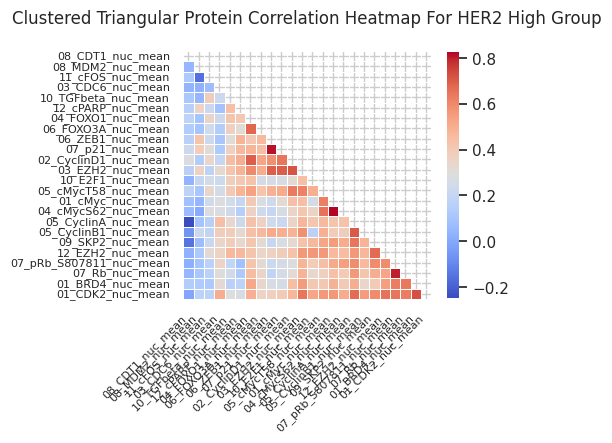

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform



# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = data_high.corr()

# Step 2: Perform hierarchical clustering
# Use 1 - correlation as the distance metric
distance_matrix = 1 - correlation_matrix
Z = linkage(squareform(distance_matrix.values, checks=False), method='average')

# Step 3: Reorder the matrix according to the clustering result
dendro = dendrogram(Z, labels=correlation_matrix.index, no_plot=True)
reordered_matrix = correlation_matrix.iloc[dendro['leaves'], dendro['leaves']]

# Step 4: Mask the upper triangle of the reordered matrix
mask = np.triu(np.ones_like(reordered_matrix, dtype=bool))

# Step 5: Plot the clustered triangular heatmap
plt.figure(figsize=(4, 4))

sns.heatmap(
    reordered_matrix,
    cmap='coolwarm',
    mask=mask,
    annot=False,
    linewidths=0.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={"shrink": 0.8}
)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Add a title
plt.title('Clustered Triangular Protein Correlation Heatmap For HER2 High Group', pad=20)

#plt.savefig("high_her2_correlation_heatmap_nuclear.svg", dpi=300, bbox_inches='tight')  # Save as SVG


# Display the plot
plt.show()


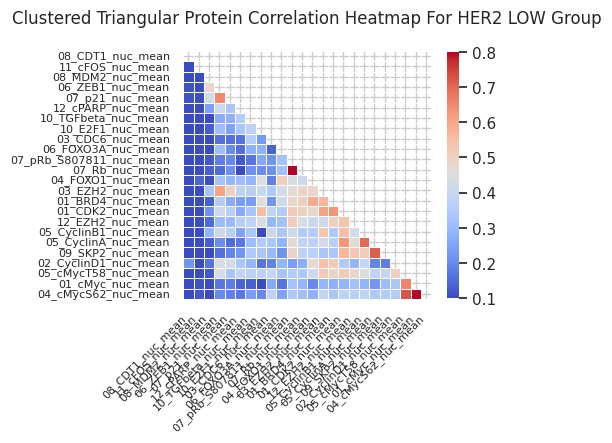

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform


# Step 1: Calculate the Pearson correlation matrix
correlation_matrix = data_low.corr()

# Step 2: Perform hierarchical clustering
# Use 1 - correlation as the distance metric
distance_matrix = 1 - correlation_matrix
Z = linkage(squareform(distance_matrix.values, checks=False), method='average')

# Step 3: Reorder the matrix according to the clustering result
dendro = dendrogram(Z, labels=correlation_matrix.index, no_plot=True)
reordered_matrix = correlation_matrix.iloc[dendro['leaves'], dendro['leaves']]

# Step 4: Mask the upper triangle of the reordered matrix
mask = np.triu(np.ones_like(reordered_matrix, dtype=bool))

# Step 5: Plot the clustered triangular heatmap
plt.figure(figsize=(4, 4))

sns.heatmap(
    reordered_matrix,
    cmap='coolwarm',
    mask=mask,
    annot=False,
    linewidths=0.5,
    square=True,
    xticklabels=True,
    yticklabels=True,
    cbar_kws={"shrink": 0.8},
    vmin=0.1,  # Minimum value for color mapping
    vmax=0.8   # Maximum value for color mapping
)

# Rotate the x-axis labels for readability
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

# Add a title
plt.title('Clustered Triangular Protein Correlation Heatmap For HER2 LOW Group', pad=20)

#plt.savefig("low_her2_correlation_heatmap_nuclear.svg", dpi=300, bbox_inches='tight')  # Save as SVG


# Display the plot
plt.show()


# Try on your Own: 

## Observations:
1. **HER2 High**:
   - Exhibits higher levels of correlations between proteins.
   - Suggests a more coordinated or networked behavior among proteins.
2. **HER2 Low**:
   - Shows lower levels of correlations.
   - Indicates less coordinated activity or greater variability between protein behaviors.

## Questions to Address:
1. **Biological Interpretation**:
   - Why might HER2 high cells exhibit stronger correlations between proteins?
   - Does this suggest increased signaling activity, tighter regulation, or specific pathways being activated in HER2 high cells?
   - Why might HER2 low cells have weaker correlations? Could this indicate disrupted pathways or less coordinated cellular behavior?

2. **Pathway Analysis**:
   - Are the proteins that show strong correlations in HER2 high cells part of known pathways or processes?
   - Do HER2 high and HER2 low cells share any similarly correlated protein pairs, or are the correlation patterns completely distinct?

3. **Variance and Localization**:
   - Do proteins with strong correlations in HER2 high cells show high variance or localized expression (e.g., nucleus vs. cytoplasm)?
   - Are there specific compartments (nuclear vs cytoplasm) where the differences between HER2 high and HER2 low are more pronounced?

4. **Cellular State**:
   - Could the differences in correlation patterns reflect differences in cellular states (e.g., proliferation, stress, or signaling)?

## 📌 Assignment: Analyzing Protein Correlations in HER2 High vs. Low Cells  

### **📝 Tasks:**  

1️⃣ **Identify Key Protein Pairs**  
   - Identify the **top 5 most strongly correlated protein pairs** in **HER2-high** cells.  
   - Compare them to the top 5 pairs in **HER2-low** cells.  
   - Are there overlaps, or are the pairs completely distinct?  

2️⃣ **Compartmental Differences**  
   - Investigate whether **HER2-high and HER2-low** cells exhibit **different correlation patterns** within specific compartments  
   - Compare **nuclear vs. cytoplasmic proteins**.  

3️⃣ **Protein Hubs**  
   - Identify **hub proteins** (highly correlated with multiple other proteins) in **HER2-high** cells.  
   - Are these hubs also present in **HER2-low** cells?  

4️⃣ **Correlation Spread**  
   - Compare the **overall distribution of correlation coefficients** between **HER2-high** and **HER2-low** cells.  
   - Does **HER2-high** have more extreme correlations (strong positive or negative values)?  

---

## **📌 Deliverables:**  

🔹 A **brief summary** of key observations and hypotheses based on the correlation plots.  
🔹 **Visualizations** to highlight key differences (e.g., **top correlated pairs, hub proteins**).  
🔹 A **discussion of potential biological mechanisms** behind the differences in correlation patterns.  

🚀 **Be ready to present your findings and discuss key insights!**  


_____________________


## Construct Protein Networks for HER2 High vs. HER2 Low Cells

### Goal:
Investigate how protein networks differ between HER2 high and HER2 low cells.

### Approach:
1. **Data Preparation**:
   - Separate the dataset into HER2 high and HER2 low groups.
   - Ensure the same set of proteins is included in both groups for fair comparison.

2. **Network Construction**:
   - Use **correlation** or **mutual information** to define edges between proteins.
   - Use tools like **NetworkX** to construct and visualize the networks for each group.
   - The **correlation** or **mutual information** will focus on protein abundances.

3. **Network Analysis**:
   - Analyze and compare key network properties for HER2 high and HER2 low groups:
     - **Degree Centrality**: Which proteins have the most connections?
     - **Betweenness Centrality**: Which proteins serve as critical "bridges" in the network?
     - **Clustering Coefficient**: Are there tightly connected clusters in the network?
   - Identify hub proteins and determine if their roles differ between HER2 high and HER2 low cells.

---

### Questions to Explore:
1. **Network Structure**:
   - How does the overall structure of the HER2 high network differ from the HER2 low network?
   - Are there more or fewer connections (edges) in the HER2 high network?

2. **Key Proteins**:
   - Which proteins act as hubs in HER2 high cells? Are these the same hubs in HER2 low cells?
   - Are there proteins with significant differences in centrality measures between the two networks?

3. **Biological Relevance**:
   - Do the hub proteins in the HER2 high network align with known HER2-related pathways?
   - Are there novel or unexpected proteins in the HER2 high network that might warrant further investigation?

4. **Cluster Comparisons**:
   - Are there tightly connected clusters in the HER2 high network? Do these clusters exist in the HER2 low network?
   - What biological processes might these clusters represent?

---

### Suggested Tools:
- **Pandas** for data manipulation.
- **Scipy** or **sklearn** for correlation and mutual information calculations.
- **NetworkX** for network construction and analysis.
- **Matplotlib** or **Plotly** for network visualization.

---

### Deliverables:
1. Visualizations of the protein correlation networks for HER2 high and HER2 low groups.
2. A summary of key differences in network properties (e.g., centrality, clustering coefficient).
3. Biological interpretation of the results, with a focus on identifying unique features of HER2 high cells.


## Step 1: Data Preparation

We will:
- Select the relevant protein columns (e.g., those with `*_nuc_mean`).
- Separate the data into two groups: **High HER2** and **Low HER2**.
- Melt the data to make it easier to visualize and analyze using tools like Seaborn.
- Rename columns for clarity and consistency.


In [18]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Define the protein names of interest and include the HER2 group classification
protein_names = selection + ['HER2_Group']

# Use the df_cell dataset
data = df_cell

# Separate data into High HER2 and Low HER2 groups
high_her2_pvalues = data[data.HER2_Group == 'High HER2']  # Filter High HER2 group
low_her2_pvalues = data[data.HER2_Group == 'Low HER2']    # Filter Low HER2 group

# Combine both groups into a single DataFrame with relevant protein columns
df = pd.concat([high_her2_pvalues, low_her2_pvalues])
df = df[protein_names]

# Melt the DataFrame for easier visualization and analysis
melted_df = df.melt(id_vars=['HER2_Group'], var_name='Protein', value_name='Expression')

# Display the first few rows of the melted DataFrame
print("Melted DataFrame for analysis:")
melted_df.head()


Melted DataFrame for analysis:


,HER2_Group,Protein,Expression
0,High HER2,01_cMyc_nuc_mean,-0.274626
1,High HER2,01_cMyc_nuc_mean,0.545061
2,High HER2,01_cMyc_nuc_mean,-0.572976
3,High HER2,01_cMyc_nuc_mean,-0.495165
4,High HER2,01_cMyc_nuc_mean,-0.113178


In [25]:
# Select columns containing 'nuc_mean'
jj = [i for i in df.columns if i in selection] # 'selecton' is the selection of mainly nuclear proteins

# Separate data into high and low HER2 groups
high_her2_df = df[df['HER2_Group'] == 'High HER2']
low_her2_df = df[df['HER2_Group'] == 'Low HER2']

# Rename columns to shorten them
high_df = high_her2_df[jj]
high_df.columns = [i.split('_')[1] for i in high_df.columns]
high_df.columns = ['cMyc', 'BRD4', 'CDK2', 'CyclinD1', 'CDC6', 'EZH2_1', 'cMycS62', 'FOXO1',
                   'cMycT58', 'CyclinA', 'CyclinB1', 'FOXO3A', 'ZEB1', 'pRb', 'Rb', 'p21',
                   'CDT1', 'MDM2', 'SKP2', 'TGFbeta', 'E2F1', 'cFOS', 'EZH2_2', 'cPARP']
low_df = low_her2_df[jj]
low_df.columns = [i.split('_')[1] for i in low_df.columns]
low_df.columns = ['cMyc', 'BRD4', 'CDK2', 'CyclinD1', 'CDC6', 'EZH2_1', 'cMycS62', 'FOXO1',
                  'cMycT58', 'CyclinA', 'CyclinB1', 'FOXO3A', 'ZEB1', 'pRb', 'Rb', 'p21',
                  'CDT1', 'MDM2', 'SKP2', 'TGFbeta', 'E2F1', 'cFOS', 'EZH2_2', 'cPARP']


In [26]:
high_df.head()

,cMyc,BRD4,CDK2,CyclinD1,CDC6,EZH2_1,cMycS62,FOXO1,cMycT58,CyclinA,CyclinB1,FOXO3A,ZEB1,pRb,Rb,p21,CDT1,MDM2,SKP2,TGFbeta,E2F1,cFOS,EZH2_2,cPARP
index_column,,,,,,,,,,,,,,,,,,,,,,,,
cell_24,-0.274626,-0.632049,0.130158,-0.217049,1.356144,0.482767,-0.536020,-0.987532,0.243860,-0.927233,-0.002703,0.406510,0.887332,0.114794,-0.430899,1.254235,1.871959,0.461608,0.422949,-0.434054,-0.922134,0.300361,0.626121,0.519019
cell_31,0.545061,0.302935,0.875525,-0.523494,0.560125,0.388460,0.624579,-0.696834,0.404130,0.377436,0.506497,0.032809,0.346244,1.209497,0.987865,0.753873,-0.235938,-0.070285,1.566281,-0.004364,-0.017985,0.250767,1.478013,0.019616
cell_52,-0.572976,-0.730484,-0.241799,-1.112824,0.666691,-0.573224,-0.321901,-1.132744,-0.474945,-0.864963,-0.763451,-0.606523,-0.524979,0.298706,-1.456988,-0.469322,-0.731447,-0.068177,0.320168,-0.721937,-0.240088,-0.434629,0.611801,-0.823589
cell_70,-0.495165,-1.028390,-0.464403,-0.331493,0.187237,-0.030267,-0.509239,-0.872779,-0.265677,-0.898469,0.641768,-0.309283,0.356119,-0.915906,-0.622274,0.747636,-0.320279,0.069460,-0.295044,-0.176602,-0.747359,0.005017,-0.130655,0.087914
cell_89,-0.113178,0.091115,-0.129332,-0.146598,0.550189,0.387248,-0.207807,-0.413124,0.219866,0.036978,0.372320,0.210634,0.704888,0.275901,0.021384,1.016665,0.741232,0.021952,0.906976,0.450721,0.422467,0.759595,0.697668,0.334607


## Step 2: Construct Protein Correlation Networks

Using correlation values, we will construct Protein networks for high HER2 and low HER2 groups.
Edges between proteins are created when their correlation exceeds a given threshold.


In [28]:
pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 56.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
import networkx as nx


# Function to create a correlation network
def create_network(data, threshold=0.5):
    corr = data.corr()
    G = nx.Graph()
    for col in corr.columns:
        for idx in corr.index:
            if col != idx and abs(corr.at[idx, col]) > threshold:
                G.add_edge(col, idx, weight=corr.at[idx, col])
    return G

# Create networks for high and low HER2 groups
high_her2_network = create_network(high_df)
low_her2_network = create_network(low_df)


## Step 3: Analyze Network Properties

We will calculate and compare key network properties:
- **Degree Centrality**: Number of direct connections each protein has.
- **Betweenness Centrality**: Importance of a protein as a "bridge" in the network.
- **Clustering Coefficient**: Likelihood that a protein's neighbors are also connected.
- **Eigenvector Centrality**: Influence of a protein in the network based on its connections.


In [30]:
# Function to analyze network properties
def analyze_network(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    clustering_coefficient = nx.clustering(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    return degree_centrality, betweenness_centrality, clustering_coefficient, eigenvector_centrality

# Analyze networks
high_degree, high_betweenness, high_clustering, high_eigenvector = analyze_network(high_her2_network)
low_degree, low_betweenness, low_clustering, low_eigenvector = analyze_network(low_her2_network)


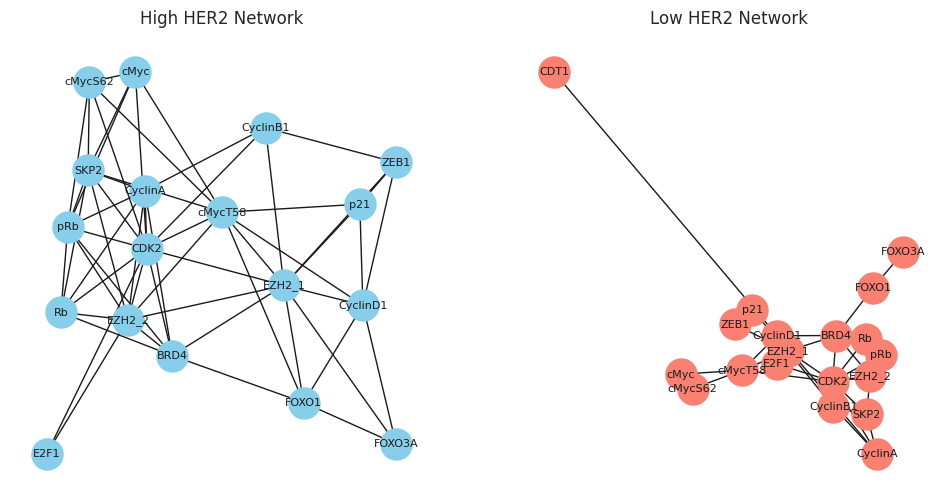

In [31]:
# Plot networks
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(high_her2_network, with_labels=True, node_color='skyblue', node_size=500, font_size=8)
plt.title('High HER2 Network')
plt.subplot(122)
nx.draw(low_her2_network, with_labels=True, node_color='salmon', node_size=500, font_size=8)
plt.title('Low HER2 Network')
plt.show()

## Final Step: Statistical Comparison of Network Metrics

### Goal:
We will compare the network metrics between **High HER2** and **Low HER2** groups using the Mann-Whitney U test. This test is appropriate for comparing non-parametric distributions.

### Metrics to Compare:
1. **Degree Centrality**: Measures the number of connections a protein has.
2. **Betweenness Centrality**: Indicates the importance of a protein as a bridge in the network.
3. **Clustering Coefficient**: Reflects the likelihood of forming clusters with neighboring proteins.

### Objective:
Determine if there are statistically significant differences in these metrics between the High HER2 and Low HER2 networks.


In [32]:
# Convert network metrics to DataFrame for better visualization
def network_metrics_to_df(degree, betweenness, clustering, group):
    df = pd.DataFrame({
        'Protein': list(degree.keys()),
        'Degree Centrality': list(degree.values()),
        'Betweenness Centrality': list(betweenness.values()),
        'Clustering Coefficient': list(clustering.values()),
        'Group': group
    })
    return df

high_metrics_df = network_metrics_to_df(high_degree, high_betweenness, high_clustering, 'High HER2')
low_metrics_df = network_metrics_to_df(low_degree, low_betweenness, low_clustering, 'Low HER2')

In [33]:
from scipy.stats import mannwhitneyu

# Combine network metrics for both groups
metrics_df = pd.concat([high_metrics_df, low_metrics_df])

# Function to compare metrics using Mann-Whitney U test
def compare_metrics(df, metric):
    high_values = df[df['Group'] == 'High HER2'][metric]
    low_values = df[df['Group'] == 'Low HER2'][metric]
    stat, p_value = mannwhitneyu(high_values, low_values)
    return p_value

# Perform statistical comparisons for each metric
degree_p_value = compare_metrics(metrics_df, 'Degree Centrality')
betweenness_p_value = compare_metrics(metrics_df, 'Betweenness Centrality')
clustering_p_value = compare_metrics(metrics_df, 'Clustering Coefficient')

# Display the results
print(f"Degree Centrality p-value: {degree_p_value:.4f}")
print(f"Betweenness Centrality p-value: {betweenness_p_value:.4f}")
print(f"Clustering Coefficient p-value: {clustering_p_value:.4f}")


Degree Centrality p-value: 0.0002
Betweenness Centrality p-value: 0.5922
Clustering Coefficient p-value: 0.1055


## Interpretation of Results

### 1. **Degree Centrality p-value**:
- **Significance**: The p-value is significantly less than 0.05.
- **Implication**:
  - There is a statistically significant difference in degree centrality between high HER2 and low HER2 networks.
  - **Proteins in the high HER2 network are connected to more other proteins compared to those in the low HER2 network.**
  - This suggests that certain proteins might act as hubs in the high HER2 network, potentially playing critical roles in the biological processes associated with high HER2 expression.

---

### 2. **Betweenness Centrality p-value**:
- **Significance**: The p-value is greater than 0.05.
- **Implication**:
  - There is no statistically significant difference in betweenness centrality between high and low HER2 networks.
  - **The proteins serving as bridges or bottlenecks in the network do not differ significantly between the two groups.**
  - This suggests that the overall network flow and communication paths are similar between high and low HER2 conditions.

---

### 3. **Clustering Coefficient p-value**:
- **Significance**: The p-value is greater than 0.05.
- **Implication**:
  - There is no statistically significant difference in clustering coefficient between high and low HER2 networks.
  - **The tendency of proteins to form tightly connected groups or clusters is similar across the two conditions.**
  - This suggests that local network structures, such as protein complexes or functional modules, do not differ significantly between high and low HER2 networks.

---


________________

## 📌 Assignment: Expanding Protein Network and Correlation Analyses for MYC & CDC6  

### **🔎 Background**  

In previous analyses, you examined **protein correlations and network structures** for **high HER2 vs. low HER2** cell populations. Now, we will extend this approach to investigate:  

✔ **MYC**, a key oncogene involved in **cell cycle regulation, proliferation, and metabolism**.  
✔ **CDC6**, a critical regulator of **DNA replication and genomic stability**.  

By performing the same **correlation and network analyses** on MYC and CDC6, we aim to:  
🔹 Identify **similarities and differences** between MYC, CDC6, and HER2 protein networks.  
🔹 Determine whether high vs. low expression states produce **distinct network structures**.  
🔹 Explore **correlations between high and low protein expression** in different cell contexts.  

---

## **📝 Your Task:**  

### **Step 1: Compute Protein Correlations for MYC & CDC6**  
🔹 Identify **cell lines with high MYC and low MYC expression**.  
🔹 Identify **cell lines with high CDC6 and low CDC6 expression**.  
🔹 Calculate **protein-protein correlation matrices** for both **MYC** and **CDC6** across these groups.  
🔹 Compare with the correlation patterns observed in the **HER2 analysis**.  

---

### **Step 2: Construct Protein Networks for High vs. Low Expression Groups**  
🔹 **Build a network graph** of protein interactions for **high MYC vs. low MYC**.  
🔹 **Build a network graph** of protein interactions for **high CDC6 vs. low CDC6**.  
🔹 Visualize and compare these networks against the **high HER2 vs. low HER2 networks**.  
🔹 Identify key **hub proteins** and **functional modules** in each network.  

---

### **Step 3: Compare Network Structures & Functional Implications**  
🔹 How do **MYC, CDC6, and HER2 protein networks** compare?  
🔹 Are there **shared hub proteins** across different networks?  
🔹 What functional pathways are enriched in **high vs. low MYC and CDC6 networks**?  
🔹 Do the **same proteins correlate strongly in all cases**, or do correlation patterns differ?  

---

## **📌 Deliverables:**  

🔹 A **brief summary** of key observations and hypotheses based on the correlation plots.  
🔹 **Visualizations** to highlight key differences (e.g., **top correlated pairs, hub proteins**).  
🔹 A **discussion of potential biological mechanisms** behind the differences in correlation patterns.  

🚀 **Be ready to present your findings and discuss key insights!**  